# <font color='red'><i>Visualizing High Dimensional MNIST Dataset with <font color = "#E91BBC"><i>PCA</i></font> and <font color="#E91BBC"><i>t_SNE</i></font>

#### **Introduction**
 
Humans can't visualize more then three dimensions but many a times data is available in more then three dimensions so to visualize  the data in 2 or 3 dimension which humans can visualize. we reduce the high dimensional data to 2/3 dimensions through Dimensionality reduction techniques like PCA and t-SNE.

#### <font color='red'><i>Objective</i></font> :  we will take a data set of 784 dimensions  and conver it in to 2 and 3 dimensions to visualize it.#   

In [1]:
#importing library 
import numpy as np
import pandas as pd

# for visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt

# for preprocessing purpose
from sklearn.preprocessing import StandardScaler

# for doing PCA
from sklearn import decomposition

# for t-SNE implemention 
from sklearn.manifold import TSNE

### MNIST dataset 
The dataset train.csv contain gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive. 
The data set(train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Data source : https://www.kaggle.com/c/digit-recognizer/data

In [2]:
# importing the dataset  
data_image = pd.read_csv('../input/digit-recognizer/train.csv')

# saving all the label in to variable "labels"
labels = data_image['label']

# saving the pixel data in to "image_vec" variable
image_vec = data_image.drop('label',axis=1)

data_image.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


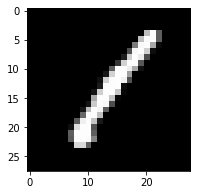

**************************************************
1
**************************************************


In [3]:
# let's look at the first image in the dataset "image_vec" and its respective label in the dataset "labels"
# we can change the below variable "no" to see other images
no = 0 
plt.figure(figsize = (3,3))
grid_data = image_vec.iloc[no].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap='gray')
plt.show()
print(50*"*")
print(labels[no])
print(50*"*")

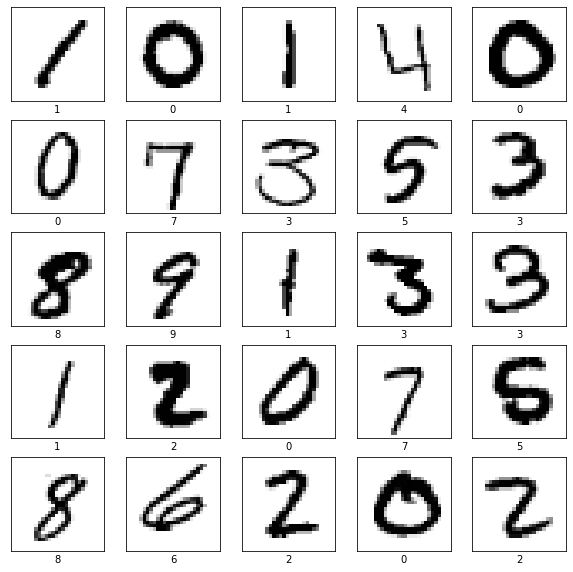

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    grid_data = image_vec.iloc[i].to_numpy().reshape(28,28)
    plt.imshow(grid_data, cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

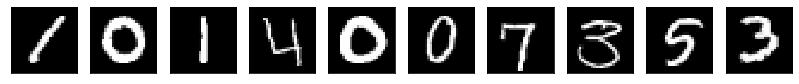

In [5]:
## First 10 images in the dataset
plt.figure(figsize=(14,14))
for digit_num in range(0,10):
    plt.subplot(1,10,digit_num+1)
    grid_data = image_vec.iloc[digit_num].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "gray")
    plt.xticks([])
    plt.yticks([])
plt.show()

There is 42000 such images each with 784 features. To visualize these data points in 2 and 3 dimension lets reduce the dimensions of the data from 784 to 2 and 3 dimension.  

### Standardize the Data
The results of PCA depend on the scaling of the variables. This can be cured by scaling each feature by its standard deviation, so that one ends up with dimensionless features with unital variance.

In [6]:
# before going forward let's standardize the data with mean zero and variance one

standardized_data = StandardScaler().fit_transform(image_vec)
print(standardized_data.shape)  

(42000, 784)


# <font color="#E91BBC"><i>**PCA without sklearn and with sklearn :**</i></font> 
Principal component analysis (PCA) is the process of computing the principal components(eigen vectors) and  projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.  

In [7]:
# PCA with out sklearn librery 

#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

covariance_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covariance_matrix.shape)


The shape of variance matrix =  (784, 784)


In [8]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 
 
# eigh function will return the eigen values in asending order
# taking top 2 eigenvalues and eigenvectors.
values, vectors = eigh(covariance_matrix, eigvals=(782,783))

print('Largest eigen value is {}'.format(values[1]))
print('Second largest eigen is {}'.format(values[0]))


Largest eigen value is 1709211.410825748
Second largest eigen is 1222652.4461378634


In [9]:
# projecting the original data points on the plane 
# formed by two principal eigen vectors.

new_coordinates = np.matmul(vectors.T, sample_data.T)

print (" resultanat new data point's shape is  ", vectors.T.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data point's shape is   (2, 784) X (784, 42000)  =  (2, 42000)


In [10]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("2nd_principal", "1st_principal", "label"))
print(dataframe.head())

   2nd_principal  1st_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


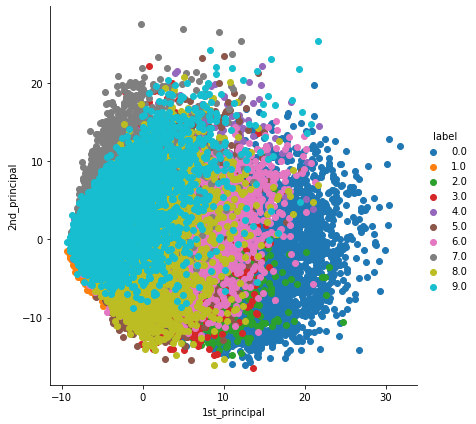

In [11]:
# ploting the 2d data points with seaborn
sns.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [12]:
### PCA with sklearn 
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_data will contain the 2-d projects of sample data on the top 2 eigen vector direction
print("shape of pca_data.shape = ", pca_data.shape)

shape of pca_data.shape =  (42000, 2)


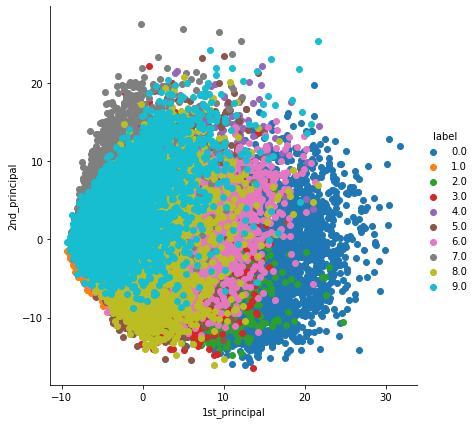

In [13]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [14]:
### PCA with sklearn for projection of data on top 3 eigen vector. 
pca = decomposition.PCA()
pca.n_components = 3
pca_data_3 = pca.fit_transform(sample_data)

In [15]:
pca_data_3 = np.vstack((pca_data_3.T, labels)).T
pca_df_3 = pd.DataFrame(data = pca_data_3, columns=("1st_principal", "2nd_principal","3rd_principal", "label"))

In [16]:
import plotly.express as px
fig = px.scatter_3d(pca_df_3, x='1st_principal', y='2nd_principal', z='3rd_principal',
              color='label')
fig.show()

Below is the graph between Number of components and cumulatuive variance explained. we can see that 400 features explaines more the 95% of variance in the data.  

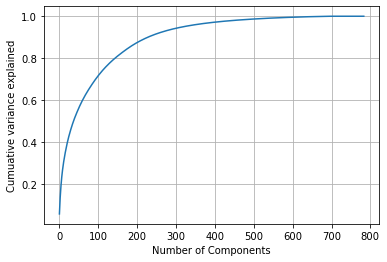

In [17]:
pca = decomposition.PCA()
pca = pca.fit(standardized_data)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumuative variance explained');

### <font color = 'red'><i>**Conclusion of PCA Results on MNIST Dataset :**</i></font>
 The PCA performed well when it comes to seperating some digits like 1's form 0's but perrformed not so good when seperating all the digits in the MNIST dataset this is because PCA is <font color='blue'> <i> linear projection technique</i></font> so it does not take non liner dependencies in to consideration.  

# <font color="#E91BBC"><i>**t-SNE with sklearn:**</i></font>
t-distributed stochastic neighbor embedding (t-SNE) is a machine learning algorithm for visualization based on Stochastic Neighbor Embedding 
It is a <font color='blue'> <i> nonlinear reduction technique</i></font>  well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions.

We will not be doing t-SNE from scrach as in the case of PCA becaues its math is non-trivial but a high level overview of t-SNE is that it tries to preserve the tropology of the data. For every point, it constructs a notion of which other points are its neighbors, trying to make all points have the same number of neighbors. Then it tries to embed them in to low dimensional space so that those points all have the same number of neighbors. 

In [18]:
print(standardized_data.shape)
print(labels.shape)

(42000, 784)
(42000,)


Two parameters perplexity and n_iter(number of iterations) are the two most important parameters for the t-SNE algorithm

* <font color = '#398114'><i>**Perplexity :**</i></font> perplexity, loosely says how to balance attention between local  and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. Typical values are between 5 and 50.  Getting the most from t-SNE may mean analyzing multiple plots with different perplexities..
 
* <font color="#398114"><i>**n_iter :**</i></font> Maximum number of iterations for the optimization we iterate until we reaching a stable configuration of plot.


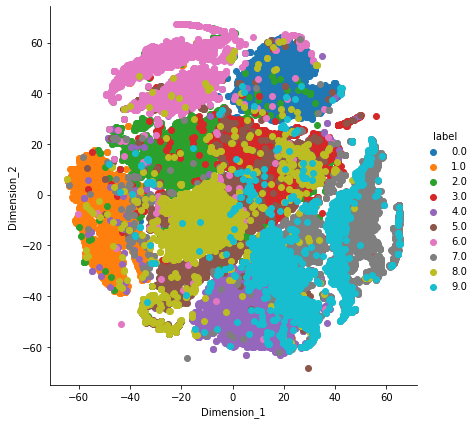

In [19]:

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200

# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(standardized_data)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels.T)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension_1", "Dimension_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", height=6).map(plt.scatter, 'Dimension_1', 'Dimension_2').add_legend()
plt.show()

### <font color='red'><i>**Conclusion of t-SNE results on MNIST**</i></font>
t-SNE has gives much better result as compared to PCA. Visualization form t-SNE is much more distinguishable and all the digits are well clustered in groups.

<font color='green'></i>References:</i></font>


*   http://colah.github.io/posts/2014-10-Visualizing-MNIST/
*   https://distill.pub/2016/misread-tsne/

